# 3/31 목 실시간

## logistic regression
종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/classification_data.csv')
df

,X1,X2,y
0,-2.056844,-0.752741,0
1,1.760238,1.558517,1
2,-0.447763,-1.554927,1
3,1.008459,0.529517,1
4,0.636547,0.409058,1
...,...,...,...
95,-0.129932,-0.797169,0
96,1.426902,1.244639,1
97,-0.582968,1.630750,1
98,-0.619720,1.630840,0


## 

### 2차원 평면에 그리기

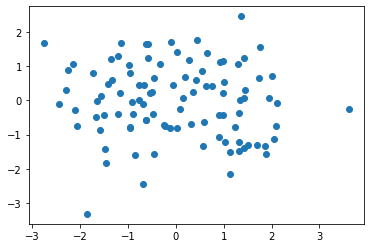

In [6]:
plt.scatter(df['X1'],df['X2']) # x1 값 x축, x2 값 y축

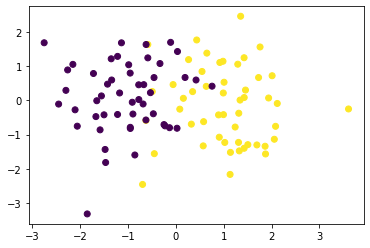

In [8]:
plt.scatter(df['X1'],df['X2'], c = df['y']) # y의 값에 따라 색이 구분

### 로지스틱 함수

In [12]:
z = np.linspace(-10, 10, 100) # -10부터 10까지 100등분
z

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [17]:
# 로지스틱 모형
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

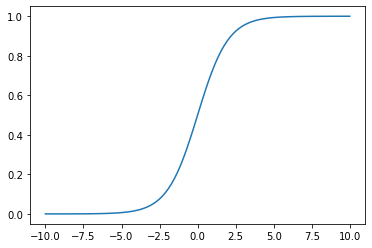

In [16]:
plt.plot(z,sigmoid(z))

### 로지스틱회귀 학습

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# 학습할 객체 생성
reg = LogisticRegression()

In [45]:
# 데이터 분할
X = df[['X1','X2']]
y = df['y']

In [24]:
# 학습
reg.fit(X,y)

LogisticRegression()

### 학습결과

In [28]:
reg.coef_ # 학습된 X1값, X2 상관계수

array([[ 2.43054461, -0.36712609]])

In [29]:
reg.intercept_ # 학습된 계수

array([0.10689852])

In [31]:
# 0, 1로 분류될 각각의 확률 예측 ( 범주형 데이터 )
reg.predict_proba(X) # 기존 학습된 데이터를 다시 넣어서 1로 분류될 확률을 예측

array([[9.90204636e-01, 9.79536428e-03],
       [2.16034429e-02, 9.78396557e-01],
       [6.01220904e-01, 3.98779096e-01],
       [8.59905428e-02, 9.14009457e-01],
       [1.81847933e-01, 8.18152067e-01],
       [2.31471531e-02, 9.76852847e-01],
       [8.01536679e-02, 9.19846332e-01],
       [5.28638688e-03, 9.94713613e-01],
       [9.77531302e-01, 2.24686977e-02],
       [3.84792683e-01, 6.15207317e-01],
       [9.41969580e-01, 5.80304202e-02],
       [7.59873010e-02, 9.24012699e-01],
       [9.65035530e-01, 3.49644700e-02],
       [6.63214901e-01, 3.36785099e-01],
       [8.71347465e-01, 1.28652535e-01],
       [4.27442195e-03, 9.95725578e-01],
       [5.57538943e-01, 4.42461057e-01],
       [5.86839648e-03, 9.94131604e-01],
       [1.10591010e-01, 8.89408990e-01],
       [3.84522870e-01, 6.15477130e-01],
       [1.42199788e-01, 8.57800212e-01],
       [9.36857280e-01, 6.31427205e-02],
       [9.96690025e-01, 3.30997536e-03],
       [2.83124745e-02, 9.71687526e-01],
       [5.814663

In [33]:
# 1로 분류될 확률
reg.predict_proba(X)[:,1] # 행은 다 뽑고 열에서 두 번쨰 값

array([9.79536428e-03, 9.78396557e-01, 3.98779096e-01, 9.14009457e-01,
       8.18152067e-01, 9.76852847e-01, 9.19846332e-01, 9.94713613e-01,
       2.24686977e-02, 6.15207317e-01, 5.80304202e-02, 9.24012699e-01,
       3.49644700e-02, 3.36785099e-01, 1.28652535e-01, 9.95725578e-01,
       4.42461057e-01, 9.94131604e-01, 8.89408990e-01, 6.15477130e-01,
       8.57800212e-01, 6.31427205e-02, 3.30997536e-03, 9.71687526e-01,
       4.18533625e-01, 4.50699667e-01, 7.64652303e-01, 3.67426783e-02,
       8.51702521e-01, 5.60984835e-02, 9.74845753e-01, 3.15143549e-01,
       9.83538602e-01, 9.67929571e-01, 2.24298915e-01, 9.91006356e-01,
       5.79244426e-01, 9.35934283e-01, 2.91520200e-01, 7.04274034e-01,
       9.83135422e-01, 1.27702994e-01, 9.99872585e-01, 2.32780030e-01,
       2.84490994e-02, 1.10969732e-01, 9.68908637e-01, 4.58623594e-01,
       1.45927355e-01, 2.32036460e-01, 7.55926094e-01, 9.54594429e-01,
       7.14597968e-01, 1.26339007e-02, 1.30213800e-01, 8.74020023e-01,
      

### 직접 식을 계산한 값과 sklearn을 통해 학습한 값 비교

In [37]:
W = reg.coef_
b = reg.intercept_
sigmoid(np.dot(X, W.T)+b) #== reg.predict_proba(X)[:,1]

array([[9.79536428e-03],
       [9.78396557e-01],
       [3.98779096e-01],
       [9.14009457e-01],
       [8.18152067e-01],
       [9.76852847e-01],
       [9.19846332e-01],
       [9.94713613e-01],
       [2.24686977e-02],
       [6.15207317e-01],
       [5.80304202e-02],
       [9.24012699e-01],
       [3.49644700e-02],
       [3.36785099e-01],
       [1.28652535e-01],
       [9.95725578e-01],
       [4.42461057e-01],
       [9.94131604e-01],
       [8.89408990e-01],
       [6.15477130e-01],
       [8.57800212e-01],
       [6.31427205e-02],
       [3.30997536e-03],
       [9.71687526e-01],
       [4.18533625e-01],
       [4.50699667e-01],
       [7.64652303e-01],
       [3.67426783e-02],
       [8.51702521e-01],
       [5.60984835e-02],
       [9.74845753e-01],
       [3.15143549e-01],
       [9.83538602e-01],
       [9.67929571e-01],
       [2.24298915e-01],
       [9.91006356e-01],
       [5.79244426e-01],
       [9.35934283e-01],
       [2.91520200e-01],
       [7.04274034e-01],


### 분류 결과 예측

In [39]:
# 학습된 로지스틱회귀가 예측한 결과값
y_predict = reg.predict(X)
y_predict

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [47]:
# T 는 1 , F는 0으로 간주하고 T의 합을 구한다
np.sum(y == y_predict)

89

### 의사결정 경계선
$ h(x) = w_0 + w_1x_1 + w_2x_2  0 = w_0 + w_1x_1 + w_2x_2x_2 = -w_0 + w_1x_1 / w_2 $

In [52]:
W[0,0]

2.430544605946542

## 타이타닉 생존예측